In [435]:
import pandas as pd

df = pd.read_csv('../titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [436]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [437]:
df['Sex_num'] = df['Sex'].apply(lambda x : {'male':0,'female':1}[x])
df['Embarked_num'] = df['Embarked'].fillna(value='S').apply(lambda x : {'S':0,'C':1,'Q':2}[x])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Embarked_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
 12  Sex_num       891 non-null    int64  
 13  Embarked_num  891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


In [439]:
df.select_dtypes(['number']).corr(method='spearman')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_num,Embarked_num
PassengerId,1.000000,-0.005007,-0.034091,0.041010,-0.061161,0.001235,-0.013975,-0.042939,-0.025811
Survived,-0.005007,1.000000,-0.339668,-0.052565,0.088879,0.138266,0.323736,0.543351,0.135861
Pclass,-0.034091,-0.339668,1.000000,-0.361666,-0.043019,-0.022801,-0.688032,-0.135775,-0.004962
Age,0.041010,-0.052565,-0.361666,1.000000,-0.182061,-0.254212,0.135051,-0.083330,0.004789
SibSp,-0.061161,0.088879,-0.043019,-0.182061,1.000000,0.450014,0.447113,0.195204,-0.024673
Parch,0.001235,0.138266,-0.022801,-0.254212,0.450014,1.000000,0.410074,0.254512,-0.055119
Fare,-0.013975,0.323736,-0.688032,0.135051,0.447113,0.410074,1.000000,0.259593,-0.010172
Sex_num,-0.042939,0.543351,-0.135775,-0.083330,0.195204,0.254512,0.259593,1.000000,0.120400
Embarked_num,-0.025811,0.135861,-0.004962,0.004789,-0.024673,-0.055119,-0.010172,0.120400,1.000000


/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

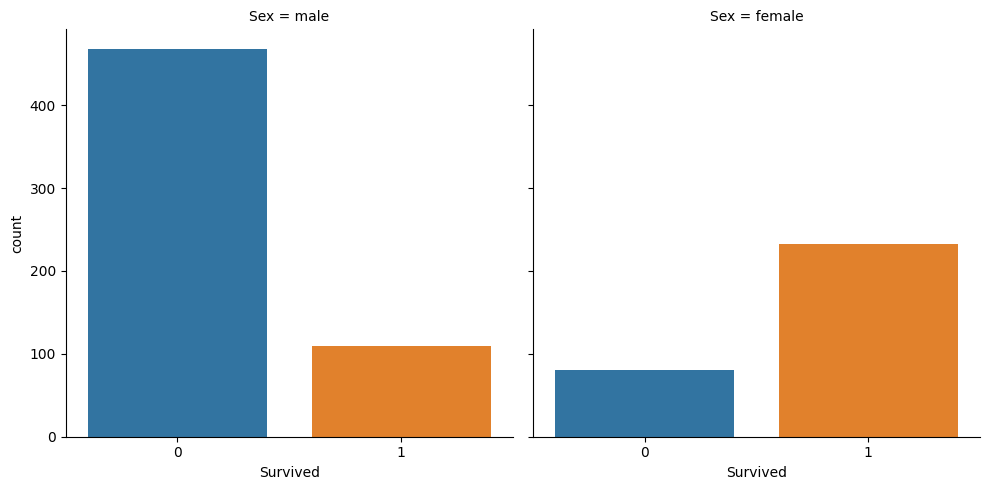

In [440]:
import seaborn as sns

sns.catplot(x='Survived', col='Sex' ,kind='count', data= df)

In [441]:
def bayes(B,A_B): #P(A|B)
    return A_B/B

In [442]:
sex = df['Sex'].value_counts()
survived = df['Survived'].value_counts()
sex, survived

(Sex
 male      577
 female    314
 Name: count, dtype: int64,
 Survived
 0    549
 1    342
 Name: count, dtype: int64)

In [443]:
sex_sur = df[['Sex','Survived']].groupby(['Survived'])['Sex'].value_counts()
sex_sur

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

In [444]:
# 남자이면 생존할 확률 # P(sur == 1|sex=='male')
A  = sex['male']/sex.sum() #남자 비율
B = survived[1]/survived.sum()
A_B = sex_sur[1]['male']/survived.sum()
male_1_p, male_0_p = bayes(A,A_B), bayes(A, sex_sur[0]['male']/survived.sum())

# 여자일때 생존할 확률
A_B = sex_sur[1]['female']/survived.sum()
female_1_p, female_0_p = bayes(1-A,A_B), bayes(1-A, sex_sur[0]['female']/survived.sum())
(male_1_p,female_1_p),(male_0_p, female_0_p)


((0.18890814558058924, 0.7420382165605096),
 (0.8110918544194108, 0.2579617834394905))

- pclass

In [445]:
pclass = df['Pclass'].value_counts()
pclass

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [446]:
pcl_sur = df[['Pclass','Survived']].groupby(['Pclass'])['Survived'].value_counts()
pcl_sur

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [447]:
pclass.sum()

891

In [448]:
#p1일 때 생존확률
p1_1_p = bayes(pclass[1]/pclass.sum(), pcl_sur[1][1]/pclass.sum())
p2_1_p = bayes(pclass[2]/pclass.sum(), pcl_sur[2][1]/pclass.sum())
p3_1_p = bayes(pclass[3]/pclass.sum(), pcl_sur[3][1]/pclass.sum())


p1_0_p = bayes(pclass[1]/pclass.sum(), pcl_sur[1][0]/pclass.sum())
p2_0_p = bayes(pclass[2]/pclass.sum(), pcl_sur[2][0]/pclass.sum())
p3_0_p = bayes(pclass[3]/pclass.sum(), pcl_sur[3][0]/pclass.sum())

(p1_1_p,p2_1_p,p3_1_p), (p1_0_p,p2_0_p,p3_0_p)

((0.6296296296296297, 0.47282608695652173, 0.24236252545824846),
 (0.37037037037037035, 0.5271739130434783, 0.7576374745417515))

- age

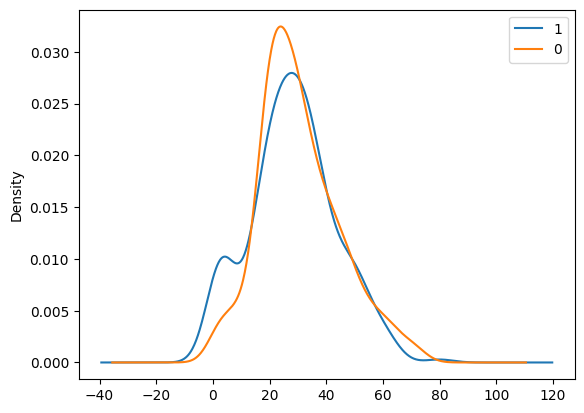

In [449]:
import matplotlib.pyplot as plt
df['Age'][df['Survived']==1].plot(kind = 'kde')
df['Age'][df['Survived']==0].plot(kind = 'kde')
plt.legend([1,0])

In [450]:
df[['Survived','Age','Sex']].groupby(['Survived','Sex'])['Age'].describe()

count       mean        std   min    25%   50%    75%   max
Survived Sex                                                                
0        female   64.0  25.046875  13.618591  2.00  16.75  24.5  33.25  57.0
         male    360.0  31.618056  14.056019  1.00  21.75  29.0  39.25  74.0
1        female  197.0  28.847716  14.175073  0.75  19.00  28.0  38.00  63.0
         male     93.0  27.276022  16.504803  0.42  18.00  28.0  36.00  80.0

In [451]:
age = 5


age_1_6 = len(df[(df['Age']==age)&(df['Survived']==1)])/len(df[df['Age']==age]) 
age_1_6

1.0

In [452]:
df['Age'].isnull().sum()

177

In [453]:
from scipy import stats
drop_df = df.dropna(subset=['Age'], axis=0)
stats.pointbiserialr(drop_df['Survived'],drop_df['Age'])  


SignificanceResult(statistic=-0.07722109457217738, pvalue=0.039124654013482904)

In [454]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [455]:
df['Age']=df['Age'].fillna(value=df['Age'].median())
df['Age']=df['Age'].astype('int')

In [456]:

df['Age']=pd.cut(df['Age'],bins=[0,10,20,30,40,50,60,70,80,float('inf')],labels=[0,10,20,30,40,50,60,70,80], right=False)

df['Age'] 

0      20
1      30
2      20
3      30
4      30
       ..
886    20
887    10
888    20
889    20
890    30
Name: Age, Length: 891, dtype: category
Categories (9, int64): [0 < 10 < 20 < 30 ... 50 < 60 < 70 < 80]

In [481]:

t,f = 0,0
w1,w2,w3 = 0.8,0.7,0.3
e=1e-3
sex_prob = {0:{'male':male_0_p, 'female':female_0_p}, 1:{'male':male_1_p, 'female':female_1_p}}
pclass_prob = {0:{1:p1_0_p, 2:p2_0_p, 3:p3_0_p}, 1:{1:p1_1_p, 2:p2_1_p, 3:p3_1_p}}
for i,row in df.iterrows():
    age = row['Age']
    age_1 = len(df[(df['Age']==age)&(df['Survived']==1)])/len(df[df['Age']==age]) # 나이에 따른 생존 확률
    age_0 = len(df[(df['Age']==age)&(df['Survived']==0)])/len(df[df['Age']==age])

    x = w1*sex_prob[1][row['Sex']]+w2*pclass_prob[1][row['Pclass']]+w3*age_1 - w1*sex_prob[0][row['Sex']]+w2*pclass_prob[0][row['Pclass']]+w3*age_0 
    
    if :
        target = 1
        w1+=e
        w2+=e
        w3+=e
    else : 
        target = 0
        w1-=e
        w2-=e
        w3-=e

    if target == row['Survived'] : t += 1
    else : f += 1

t/len(df), f/len(df)
    


(0.7687991021324355, 0.23120089786756454)

In [471]:
test_data = pd.read_csv('../titanic/test.csv')
test_data['Survived'] = 0
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [472]:
test_data['Age']=test_data['Age'].fillna(value=test_data['Age'].median())
test_data['Age']=test_data['Age'].astype('int')
df['Age']=pd.cut(df['Age'],bins=[0,10,20,30,40,50,60,70,80,float('inf')],labels=[0,10,20,30,40,50,60,70,80], right=False)
(test_data['Age'].value_counts()==0).unique()

array([False])

In [476]:
for i,row in test_data.iterrows():
    age = row['Age']
    

    if sex_prob[0][row['Sex']]+0.8*pclass_prob[0][row['Pclass']]+0.5*age_0 < sex_prob[1][row['Sex']]+0.8*pclass_prob[1][row['Pclass']]+0.5*age_1:
        test_data.loc[i,'Survived'] = 1

test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,27,0,0,359309,8.0500,NaN,S,0


In [477]:
test_data['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [478]:
result = test_data[['PassengerId','Survived']].set_index('PassengerId')
result

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [479]:
result.to_csv('../titanic/result4.csv')